Clusteirng exercise using KMeans and the mall customers dataset from kaggle

In [27]:
#Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [5]:
#Import the data as a dataframe
name = 'Mall_Customers.csv'
df1 = pd.read_csv(name, index_col = 'CustomerID')
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [6]:
#Investigate the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [7]:
#Convert the gender data to numerical
gender_code = LabelEncoder()
df1['gender_code'] = gender_code.fit_transform(df1['Gender'])
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),gender_code
CustomerID,,,,,
1,Male,19,15,39,1
2,Male,21,15,81,1
3,Female,20,16,6,0
4,Female,23,16,77,0
5,Female,31,17,40,0


In [8]:
#Create a dataframe that excludes the original gender columns
df2 = df1.iloc[:,1:5]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
gender_code               200 non-null int64
dtypes: int64(4)
memory usage: 7.8 KB


In [24]:
#Shorten column names to make them easier to work with
df2.rename(columns = {'Annual Income (k$)':'Income','Spending Score (1-100)':'Spend'}, inplace = True)
df2.head()

,Age,Income,Spend,gender_code,cluster
CustomerID,,,,,
1,19,15,39,1,0
2,21,15,81,1,3
3,20,16,6,0,0
4,23,16,77,0,3
5,31,17,40,0,0


In [15]:
#Find the right number of clusters
empty= []
r = range(1,10)

for i in r:
    km = KMeans(n_clusters = i)
    y = km.fit_predict(df2)
    empty.append(km.inertia_)
    
empty

[308862.06,
 212889.44245524297,
 143391.5923603568,
 104422.8349853975,
 75399.61541401483,
 58348.64136331505,
 51132.7032125769,
 44357.6215098352,
 40895.6333004958]

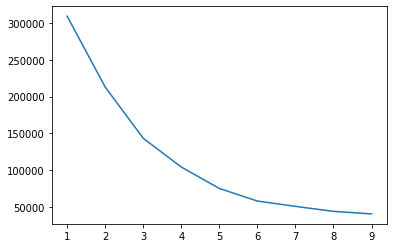

In [16]:
plt.plot(r, empty)

In [17]:
#Redo KMeans using 6 clusters
km = KMeans(n_clusters = 6)
y = km.fit_predict(df2)

In [29]:
#Add the cluster labels to the dataframe
df2['cluster'] = y
df2.head()

,Age,Income,Spend,gender_code,cluster
CustomerID,,,,,
1,19,15,39,1,0
2,21,15,81,1,3
3,20,16,6,0,0
4,23,16,77,0,3
5,31,17,40,0,0


In [46]:
#Get the centroids into a dataframe
z = km.cluster_centers_

df3 = pd.DataFrame(z, columns = ['Age','Income','Spend','gender_code'])
df3.head()
df4 = df3.loc[:,['Income','Spend']]

In [57]:
#Show the summary statistics for each cluster
df2.groupby('cluster').mean().sort_values(by = 'Spend')

,Age,Income,Spend,gender_code
cluster,,,,
5,41.685714,88.228571,17.285714,0.571429
0,44.318182,25.772727,20.272727,0.409091
2,27.000000,56.657895,49.131579,0.342105
4,56.340909,53.704545,49.386364,0.431818
3,25.272727,25.727273,79.363636,0.409091
1,32.692308,86.538462,82.128205,0.461538


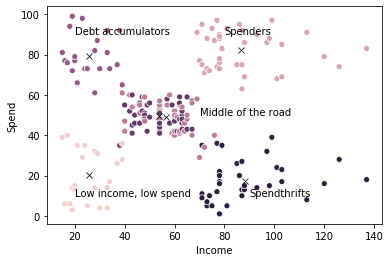

In [68]:
#Visually show the clusters
sns.scatterplot(data = df2, x = df2['Income'], y = df2['Spend'], hue = df2['cluster'])
g = sns.scatterplot(data= df4, x = df4['Income'], y = df4['Spend'], marker = 'x', color = 'k')
g.text(20,10,'Low income, low spend')
g.text(20,90,'Debt accumulators')
g.text(80,90,'Spenders')
g.text(90,10,'Spendthrifts')
g.text(70,50,'Middle of the road')
g.legend_.remove()
plt.show()